## Hoja de Ejercicios 8 - Análisis científico en Python - SciPy

### PROBLEMA 1
Un circuito eléctrico tiene una fuente de voltaje $v_s$ con una resistencia interna $r_s$, y una resistencia de carga $R_L$. La potencia *P* disipada en la carga de la resistencia viene dada por:

$$ P = \frac{v_s^2R_L}{(R_L+r_s)^2} $$

Represente la potencia $P$ en funcion de $R_L$ en el intervalo 1 $\leq$ $R_L$ $\leq$ 10 ohmios suponiendo los siguientes valores para el circuito: $v_s$ = 12 V, $r_s$ = 2.5 ohmios (para observar la imagen debajo descargue el archivo fig_circuito.jpg adjuntado y copiélo en la misma carpeta de trabajo de este archivo jupyter)

![alt text](fig_circuito.jpg)

BONUS: Muestre el valor de la potencia máxima disipada y el valor de la resistencia de carga en la que se produce la máxima disipación de potencia.

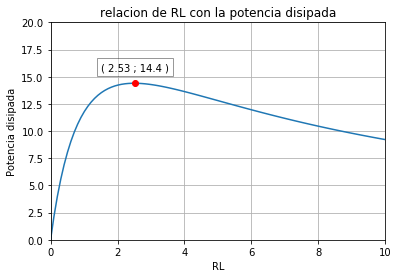

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import string
vs=12
rs=2.5
rl= np.linspace(0, 10, 100)
p=(vs**2*rl)/((rl+rs)**2)

pmax=rl[p==np.max(p)]
rlmax=np.max(p)
t0=str(np.round(pmax,2))

t1=str(np.round(rlmax,2))
texto="( " + t0[1:-1] + ' ; ' + t1 + " )"
plt.plot(rl,p)
plt.plot(rl[p==np.max(p)],np.max(p), 'or')

plt.title("relacion de RL con la potencia disipada")
plt.ylabel("Potencia disipada")
plt.xlabel("RL")

plt.text(pmax,rlmax+1,texto, bbox=dict(facecolor='w', alpha=0.4), horizontalalignment='center', va='bottom')

plt.axis([0,10,0,20])
plt.grid()
plt.show()


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact

def limite(t,rl):
    vs=12
    rs=2.5
    x= np.linspace(0, t,1000)
    y=(vs**2*x)/((x+rs)**2)
    plt.plot(x,y)
    plt.title("relacion de RL con la potencia disipada")
    plt.ylabel("Potencia disipada")
    plt.xlabel("RL")
    
    plt.axis([0,t,0,20])
    plt.grid()
    if rl<=t:
        sx=rl
        sy=(vs**2*rl)/((rl+rs)**2)
    else:
        sx=t #x[y==np.max(y)]
        sy=(vs**2*t)/((t+rs)**2)  #np.max(y)
    if np.max(y)-0.01<=sy<=np.max(y)+0.01:
        w='r'
    else:
        w='c'
    punto= "Rl="+str(round(sx,2))+' ; P='+str(round(sy,2)) 
    plt.text(np.mean(x),16,punto, bbox=dict(facecolor=w, alpha=0.4),
             horizontalalignment='center', va='bottom')
    plt.plot(sx,sy, 'or')
    

C:\ProgramData\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
interact(limite,t=(0.01,100),rl=(0.01,50)) # limite de cuanto a cuanto para interactuar

plt.show()

interactive(children=(FloatSlider(value=50.004999999999995, description='t', min=0.01), FloatSlider(value=25.0…

### PROBLEMA 2
El valor $V$ de un capital inicial $P$ en una cuenta de ahorro que paga un interes anual de $r$, viene dado por:

$$ V = P(1 + \frac{r}{m})^{mt} $$

, donde $m$ es el numero de capitalizaciones anuales, y $t$ es el número de años. (Si el interés se capitaliza una vez al año, entonce *m = 1*, si se hace trimestralmente *m = 4*, y así susesivamente). Si el interés se capitaliza continuamente, el valor de $V$ viene dado por $V = Pe^{rt}$.

Considere un capital inicial de S/.5,000.00 a 15 años, con un interés anual de 7.5%. Muestre la diferencia entre tener un capital anual, trimestral y continuo, representando para ello el valor del capital en función del tiempo (años) para cada método de capitalización. Represente los tres casos en un mismo gráfico, utilizando diferentes estilos de linea y colores para cada gráfica y ua leyenda , asi como título y etiqueta de los ejes.

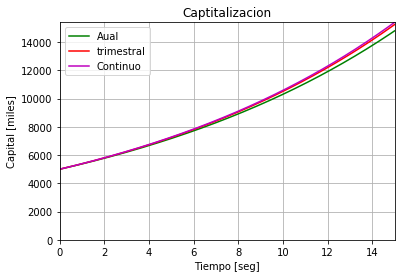

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

P=5000 #capital inicial
t = np.linspace(0, 15, 1000)    #tiempo en años
  #capitalizacion anual
r=0.075  #interes anual

Vanual=P*(((1+ r)**t))
Vtri =P*((1+ r/(4))**(4*t))
Vcont= P*(np.e**(r*t))
s=max(np.max(Vanual),np.max(Vtri),np.max(Vcont))

plt.plot(t, Vanual, color='g',  label='Aual')
plt.plot(t, Vtri, color='r', label='trimestral')
plt.plot(t, Vcont, color='m', label='Continuo')
plt.axis([0,15,0,s])
plt.title("Captitalizacion")
plt.xlabel("Tiempo [seg]")
plt.ylabel("Capital [miles]")
plt.legend(loc='upper left')

plt.grid()
plt.show()


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact

def grafica(t):
    P=5000 #capital inicial
    r=0.075
    x=np.linspace(0,t,200)
    
    y1=P*(((1+ r)**x))
    y2=P*((1+ r/(4))**(4*x))
    y3= P*(np.e**(r*x))
    m=max(np.max(y1),np.max(y2),np.max(y3))
    plt.axis([0,t,0,m])
    plt.plot(x,y1, label='Aual')
    plt.plot(x,y2, label='Trimestral')
    plt.plot(x,y3, label='Continuo')
    plt.legend(loc='upper left')
    
    plt.title("Captitalizacion")
    plt.xlabel("Tiempo [años]")
    plt.ylabel("Capital [soles]")
    plt.legend(loc='upper left')
    
    plt.grid()

In [5]:
interact(grafica,t=(0,30)) # limite de cuanto a cuanto para interactuar
plt.show()

interactive(children=(IntSlider(value=15, description='t', max=30), Output()), _dom_classes=('widget-interact'…

### PROBLEMA 3
Una resistencia de *R* = 4 ohmios y un inductor de *L* = 1.3 H se conectan en un circuito en serie a una fuente de voltaje (circuito RL). Cuando la fuente de voltaje aplica un pulso rectangular de voltaje de amplitud V = 12 durante 0.5 s, la intensidad de corriente *i(t)* en el circuito en función del tiempo viene dada por:

$ i(t) = \frac{V}{R}(1-e^{(-Rt)/L}) $ para 0 $\leq$ t $\leq$ 0.5 seg

$ i(t) = e^{(-Rt)/L}\frac{V}{R}(e^{(0.5R)/L}-1) $ para 0.5 $\leq$ t seg

Represente gráficamente la corriente en función del tiempo para $0 \leq t \leq 2$ seg

In [84]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact

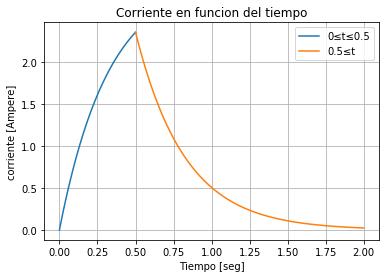

In [90]:

V=12
R=4
L=1.3
t1=np.linspace(0,0.5,100)
t2=np.linspace(0.5,2,100)
it1=(V/R)*(1 - np.e**(-R*t1/L))  # para 0  ≤  t  ≤  0.5 seg
it2=np.e**(-R*t2/L)*(V/R)*(np.e**(0.5*R/𝐿)-1)  # para 0.5  ≤  t seg

plt.plot(t1,it1,label='0≤t≤0.5' )
plt.plot(t2,it2,label='0.5≤t')

plt.title("Corriente en funcion del tiempo")
plt.xlabel("Tiempo [seg]")
plt.ylabel("corriente [Ampere]")
plt.legend(loc='upper right')

plt.grid()
plt.show()


i=-(10 V)/4.7kΩ e^((-t)/(525µs))=-2,13 e^((-t)/(525µs))  mA

No handles with labels found to put in legend.


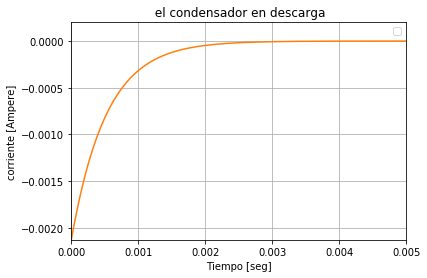

In [62]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
t=np.linspace(0,5*10**(-3),1000)
u=10**(-6)
ex=np.e**(-t/(525*u))
x=-(10/(4.7*10**3))*ex
plt.plot(np.min(x),np.max(x))
plt.plot(t,x)

plt.title(" el condensador en descarga")
plt.xlabel("Tiempo [seg]")
plt.ylabel("Voltios [Ampere]")
plt.legend(loc='upper right')
plt.axis([np.min(t),np.max(t),np.min(x),np.max(x)+0.0002])
plt.grid()
plt.show()

No handles with labels found to put in legend.


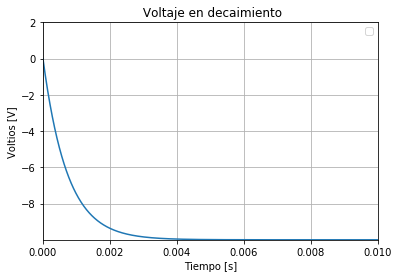

In [86]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
t=np.linspace(0,0.01,1000)

u=725*10**(-6)
x=-(10*(1-np.e**(-t/u)))


plt.plot(t,x)
plt.title(" Voltaje en decaimiento")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltios [V]")
plt.legend(loc='upper right')
plt.axis([np.min(t),np.max(t),np.min(x),np.max(x)+2])
plt.grid()
plt.show()

In [ ]:
#creacion de la clase
class Vector(object):
    def _init_(self, X1=0, Y1=0, X2=0, Y2=0):
        self.X1=X1
        self.Y1=Y1
        self.X2=X2
        self.Y2=Y2
        
    #decorativos:
    @property
    def X1(self):
        return self.__X1
    @X1.setter
    def X1(self, NX1):
        if (isinstance(NX1, int) or isinstance(NX1, float)):
            self.__X1 = NX1
            return self.__X1
        else:
            print('datos incorrectos')
            
    @property
    def Y1(self):
        return self.__Y1
    @Y1.setter
    def Y1(self, NY1):
        if (isinstance(NY1, int) or isinstance(NY1, float)):
            self.__Y1=NY1
            return self.__Y1
        else:
            print('Datos incorrectos')
    
    @property
    def X2(self):
        return self.__X2
    @X2.setter(self, NX2)
    
            
    #cargando los metodos:
    def _str_(self):
        return '[{},{},{},{}]'.format(self.X1, self.Y1, sef.X2, self.Y2)